In [ ]:
#%matplotlib inline
import scipy as sp
import scipy.io
from scipy.signal import welch, lfilter, firwin, butter, remez, freqz
import numpy as np
import pylab as pyl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('GTKAgg')
from numpy import sin, arange, pi
from pylab import figure, plot, grid, show
import time
 

In [3]:
loadedset = sp.io.loadmat("C:\Users\Rob\Desktop\Dropbox\UCSD\Labs\Voytek\CBCI\PilotData\P04(Scotty)\P04_main1.set")
EEGsetname          = loadedset['EEG'][0][0][0][0]
EEGfilename         = loadedset['EEG'][0][0][1][0]
EEGfilepath         = loadedset['EEG'][0][0][2][0]
EEGsubject          = loadedset['EEG'][0][0][3]
EEGgroup            = loadedset['EEG'][0][0][4]
EEGcondition        = loadedset['EEG'][0][0][5]
EEGsession          = loadedset['EEG'][0][0][6]
EEGcomments         = loadedset['EEG'][0][0][7]
EEGnbchan           = loadedset['EEG'][0][0][8][0][0]
EEGtrials           = loadedset['EEG'][0][0][9][0][0]
EEGpnts             = loadedset['EEG'][0][0][10][0][0]
EEGsrate            = loadedset['EEG'][0][0][11][0][0]
EEGxmin             = loadedset['EEG'][0][0][12][0][0]
EEGxmax             = loadedset['EEG'][0][0][13][0][0]
EEGtimes            = loadedset['EEG'][0][0][14][0]
EEGfdtfilename      = loadedset['EEG'][0][0][15][0]
EEGicaact           = loadedset['EEG'][0][0][16]
EEGicawinv          = loadedset['EEG'][0][0][17]
EEGicasphere        = loadedset['EEG'][0][0][18]
EEGicaweights       = loadedset['EEG'][0][0][19]
EEGicachansind      = loadedset['EEG'][0][0][20]
EEGchanlocs         = loadedset['EEG'][0][0][21][0]
EEGurchanlocs       = loadedset['EEG'][0][0][22]
EEGchaninfo         = loadedset['EEG'][0][0][23][0][0]
EEGref              = loadedset['EEG'][0][0][24][0]
EEGevent            = loadedset['EEG'][0][0][25][0]
EEGurevent          = loadedset['EEG'][0][0][26]
EEGeventdescription = loadedset['EEG'][0][0][27]
EEGepoch            = loadedset['EEG'][0][0][28]
EEGepochdescription = loadedset['EEG'][0][0][29]
EEGreject           = loadedset['EEG'][0][0][30]
EEGstats            = loadedset['EEG'][0][0][31]
EEGspecdata         = loadedset['EEG'][0][0][32]
EEGspecicaact       = loadedset['EEG'][0][0][33]
EEGsplinefile       = loadedset['EEG'][0][0][34]
EEGicasplinefile    = loadedset['EEG'][0][0][35]
EEGdipfit           = loadedset['EEG'][0][0][36]
EEGhistory          = loadedset['EEG'][0][0][37]
EEGsaved            = loadedset['EEG'][0][0][38][0]
EEGetc              = loadedset['EEG'][0][0][39]

In [4]:
loadedmat = sp.io.loadmat("C:\Users\Rob\Desktop\Dropbox\UCSD\Labs\Voytek\CBCI\PilotData\P04(Scotty)\P04_main1.mat")
EEGdata = loadedmat['tmpdata']

In [5]:
chanlocs = ()
for i in xrange(len(EEGchanlocs)):
    chanlocs = chanlocs + (EEGchanlocs[i][0][0],)

In [ ]:
## Plot single channel
# plt.plot(EEGtimes[0:1000],EEGdata[25,0:1000])
# plt.show()
channeldata = EEGdata[25,:] - np.mean(EEGdata[25,:])
fig, ax = plt.subplots(1, 1)
ax.hold(True)
plt.show(False)
plt.draw()
startindex = 0
endindex = EEGsrate
while endindex < EEGpnts:
    winstart = startindex
    winend = startindex+EEGsrate/4
    while winend < endindex:
        windata = channeldata[winstart:winend]
        points = ax.plot(windata)[0]
        
#         time.sleep(0.25)
        plt.pause(0.25)
        winend = winend + EEGsrate/4
        winstart = winstart + EEGsrate/4
    startindex = startindex + EEGsrate
    endindex = endindex + EEGsrate

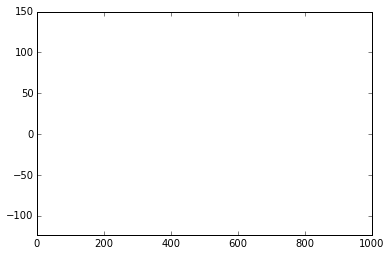

KeyboardInterrupt: 

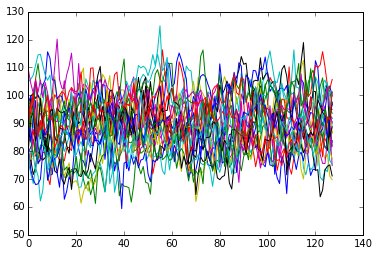

In [38]:
##Super raw all data plot
ax = plt.axes()
#Get the current color cycle as a list, then reset the cycle to be at the beginning
colors = []     
while True:
    colors.append(ax._get_lines.color_cycle.next())
    if colors[0] == colors[-1] and len(colors)>1:
        colors.pop(-1)
        break

for i in xrange(len(colors)-1):
    ax._get_lines.color_cycle.next()
    
#Plot all chans
pltstart = 0
pltend = 2000
for i in xrange(len(chanlocs)):
    plt.plot(EEGtimes[pltstart:pltend]/60000,EEGdata[i,pltstart:pltend])
    plt.ylabel('Microvolts')
    plt.xlabel('Time Mins')
plt.show()

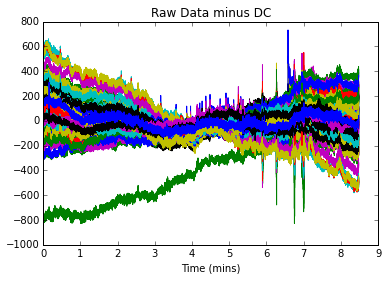

In [7]:
#Remove DC offset
tmpdata = np.zeros(np.shape(EEGdata))
for i in xrange(len(chanlocs)):
    tmpdata[i,:] = EEGdata[i,:] - np.mean(EEGdata[i,:])
    
#Get the current color cycle as a list, then reset the cycle to be at the beginning
colors = []     
while True:
    colors.append(ax._get_lines.color_cycle.next())
    if colors[0] == colors[-1] and len(colors)>1:
        colors.pop(-1)
        break
for i in xrange(len(colors)-1):
    ax._get_lines.color_cycle.next()
ax = plt.axes()

#Plot all channels
plt.figure(1)
pltstart = 0
pltend = len(EEGtimes)
for i in xrange(len(chanlocs)):
    plt.plot(EEGtimes[pltstart:pltend]/60000,tmpdata[i,pltstart:pltend])
    plt.xlabel('Time (mins)')
    plt.title('Raw Data minus DC')
plt.show()

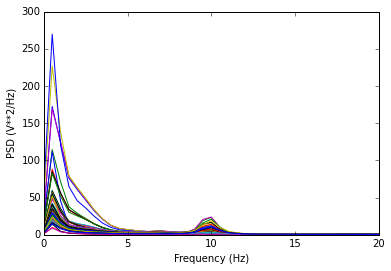

In [8]:
#Plot all spectra
plt.figure(2)
spectra = np.empty([513,EEGnbchan])
for i in xrange(len(chanlocs)):
    f, Pxx_den = welch(tmpdata[i,:],EEGsrate, nperseg=1024)
    plt.plot(f,Pxx_den)
    spectra[:,i] = Pxx_den
plt.gca().set_xlim(right=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)')
plt.show()

In [9]:
#Identify channel with highest alpha
t

[(0.0, 35, 62.475008896284024), (0.5, 35, 269.61315477678505), (1.0, 33, 138.20363243389744), (1.5, 33, 79.395838001747805), (2.0, 33, 63.454653050175907), (2.5, 33, 49.160207408759618), (3.0, 33, 34.042926315054231), (3.5, 32, 21.644619859943766), (4.0, 33, 12.957830140933567), (4.5, 33, 8.7778109678663174), (5.0, 33, 7.0792878621598145), (5.5, 33, 5.7314155292785891), (6.0, 32, 4.7993751490980889), (6.5, 37, 4.8664897697581715), (7.0, 37, 5.4325945658532548), (7.5, 37, 4.4184536682968831), (8.0, 37, 3.7945885193603432), (8.5, 46, 3.6041936929169682), (9.0, 25, 7.4644399269334025), (9.5, 25, 20.664823802217899), (10.0, 25, 23.844046644034314), (10.5, 15, 10.562911090425841), (11.0, 61, 4.9001650438150186), (11.5, 61, 2.8061746175857145), (12.0, 61, 1.7910757049642019), (12.5, 61, 1.4023536195022055), (13.0, 61, 1.1105663234345229), (13.5, 37, 1.0716157205216923), (14.0, 37, 1.0910038460669489), (14.5, 4, 1.1949896654959296), (15.0, 4, 1.1664766826573612), (15.5, 46, 1.1938900444223304

In [10]:
# ## Filter data
# filtered_data = butter_bandpass_filter(EEGdata, lo_cut, hi_cut, srate, 4)
# plt.plot(t,filtered_data)

# ## Hilbert transform data
# hilbert_data = sig.hilbert(data)
# plt.plot(t,hilbert_data)
# filtered_hilbert_data = sig.hilbert(filtered_data)

# ## Plot welch PSD
# f, Pxx_den = sig.welch(data, srate, nperseg=256)
# plt.semilogy(f, Pxx_den)
# plt.ylim([0.5e-3, 1])
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')

# ## Create some data based on AR parameters and estimate
# a = [1, -2.2137, 2.9403, -2.1697, 0.9606]
# y = sp.signal.lfilter([1], a, pyl.randn(1, 1024))
# p = pyule(y, 64)
# p()
# p.plot()

In [11]:
## Estimate data AR parameters
# AR, P, k = aryule(data, 20)
# print AR
# plt.figure(2)
# PSD = arma2psd(AR, NFFT=2*1024)
# PSD = PSD[len(PSD):len(PSD)/2:-1]
# plt.plot(linspace(0, 1, len(PSD)), 10*np.log10(np.abs(PSD)*2./(2.*np.pi)),
#     label='Estimate of y using Yule-Walker AR(4)')
# xlabel(r'Normalized frequency (\times \pi rad/sample)')
# ylabel('One-sided PSD (dB/rad/sample)')
# plt.legend()
# plt.show()

In [12]:
## Simulate data
#F_1KHz = 10.
#A_1KHz = 10.0 
#F_15KHz = 60.
#A_15KHz = 0.05
#nsamples = 1024
#sample_rate = 512
#t = arange(nsamples) / sample_rate
#signal = A_1KHz * sin(2*pi*F_1KHz*t) + A_15KHz*sin(2*pi*F_15KHz*t)
#signal = EEGdata[channel,0:nsamples] - np.mean(EEGdata[channel,0:nsamples]) + A_1KHz * sin(2*pi*F_1KHz*t)

In [13]:
## Real Biosemi EEG data, single channel, cutoffs identified
channel = 25
lowcut = 9 # cutoff in Hz
highcut = 10.5 # cutoff in Hz
sample_rate = float(EEGsrate)
signal = EEGdata[channel,:] - np.mean(EEGdata[channel,:]) # Remove DC offset

In [14]:
## Generate simple FIR lowpass filter
nyq = sample_rate / 2.
cutoff_hz = 15.0
numtaps = 29 # Length of the filter (number of coefficients, i.e. the filter order + 1)
fir_coeff = firwin(numtaps, cutoff_hz/nyq) # Use firwin to create a lowpass FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal) # Use lfilter to filter the signal with the FIR filter
warmup = numtaps - 1 # The first N-1 samples are "corrupted" by the initial conditions
delay = (warmup / 2) / sample_rate # The phase delay of the filtered signal in seconds
print '# of taps:', numtaps
print '# of coeffs:', len(fir_coeff)
print 'Filter order:', numtaps-1
print 'Phase offset:', delay, 'seconds'
sampledelay = (warmup / 2) # The phase delay of the filtered signal in samples
print 'Phase offset:', sampledelay, 'samples'
print 'FIR filter coefficients:', fir_coeff # Generated filter coefficients, numerators of FIR filter

# of taps: 29
# of coeffs: 29
Filter order: 28
Phase offset: 0.02734375 seconds
Phase offset: 14 samples
FIR filter coefficients: [ 0.00130002  0.00203782  0.00357368  0.00626587  0.01037691  0.01602498
  0.02315094  0.03150643  0.0406654   0.05005882  0.05902893  0.0668969
  0.0730356   0.07693879  0.07827781  0.07693879  0.0730356   0.0668969
  0.05902893  0.05005882  0.0406654   0.03150643  0.02315094  0.01602498
  0.01037691  0.00626587  0.00357368  0.00203782  0.00130002]


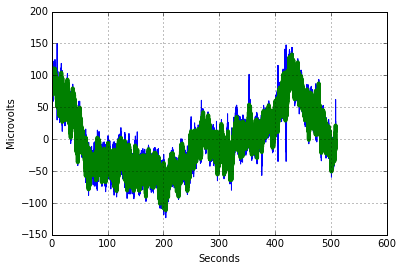

In [15]:
## Plot simple FIR lowpass filter effects
figure(1)
plot(EEGtimes/1000, signal) # Plot the original signal
plot(EEGtimes/1000-delay, # Plot the filtered signal, shifted to compensate for the phase delay
     filtered_signal, 'r-') 
plot(EEGtimes[warmup:]/1000-delay,  # Plot just the "good" part of the filtered signal.
     filtered_signal[warmup:], 'g', linewidth=4)
grid(True)
plt.gca().set_xlim(left=0)
plt.ylabel('Microvolts')
plt.xlabel('Seconds')
plt.show()

In [1]:
## Generate PM FIR filter coefficients
numtaps = 30 # of taps, PM uses only even taps
nyq = 0.5 * sample_rate #nyquist frequency - see http://www.dspguide.com/ if you want more info
b = remez(numtaps,[0, lowcut-1.5, lowcut, highcut, highcut+1.5, nyq],[0, 1, 0], Hz=sample_rate, type='bandpass') # FIR
filter_order = len(b)-1 # True only for FIR filters
print '# of taps:', numtaps
print '# of coeffs:', filter_order+1
print 'Filter order:', filter_order
print 'Filter coeffs:', b
warmup = numtaps - 1 # The first N-1 samples are "corrupted" by the initial conditions
delay = (warmup / 2) / sample_rate # The phase delay of the filtered signal in seconds
print 'Phase offset:', delay, 'seconds'
sampledelay = (warmup / 2) # The phase delay of the filtered signal in samples
print 'Phase offset:', sampledelay, 'samples'

NameError: name 'sample_rate' is not defined

C:\Python27\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


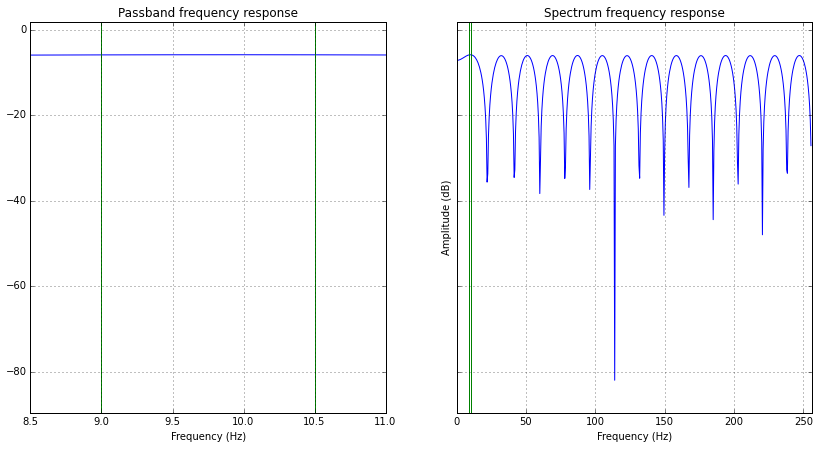

In [17]:
## Display frequency response of PM filter

## Compute frequency response
w, h = freqz(b) # frequency response for arbitrary FIR digital filter
f, axes = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
for axn, cax in enumerate(axes):
    plt.sca = cax
    ## Decide on axes units here
    #plt.plot(w, abs(h))                        #Angular frequency, Absolute response
    # plt.plot(w, 20 * np.log10(abs(h)))            #Angular frequency, dB
#     cax.plot(w*nyq/np.pi, abs(h))                #Hz, Absolute response
    cax.plot(w*nyq/np.pi, 20 * np.log10(abs(h))) #Hz, dB

    ## Display in Hz
    cax.axvline(lowcut, color='green')
    cax.axvline(highcut, color='green') 
    cax.set_xlabel('Frequency (Hz)')

    ## Display in Angular Frequency
    # plt.axvline(lowcut*np.pi/nyq, color='green') # cutoff Angular frequency
    # plt.axvline(highcut*np.pi/nyq, color='green') # cutoff Angular frequency
    # plt.xlabel('Frequency (Angular - 2*pi/sec)')

    ## Display in dB
#     plt.gca().set_ylim([-6,1.1]) # dB, should be flat in passband
    plt.ylabel('Amplitude (dB)')

    ## Display in absolute response
#     cax.set_ylim([0.45,0.55]) #Absolute response, should be flat in passband
#     cax.set_ylabel('Amplitude (Abs)')

    ## View size in Hz
    if axn == 0:
        cax.set_xlim([lowcut-0.5,highcut+0.5]) # Passband view
    if axn == 1:
        cax.set_xlim([0,nyq]) # Spectrum view

    ## View size in Angular Frequency
    # plt.gca().set_xlim([(lowcut-1)*np.pi/nyq,(highcut+1)*np.pi/nyq]) # Passband view
    # plt.gca().set_xlim([0,np.pi]) # Spectrum view

    ## Display in linear space
    cax.set_yscale('linear')
    cax.set_xscale('linear')

    ## Show
    cax.margins(0, 0.1)
    cax.grid(which='both', axis='both')
    if axn == 0:
        cax.set_title('Passband frequency response')
    if axn == 1:
        cax.set_title('Spectrum frequency response')
f.show()

In [1]:

## Apply FIR PM filter
filtered_signal = lfilter(b, 1, signal) # a=1 for FIR filters

10000 loops, best of 3: 29.6 µs per loop


NameError: name 'lfilter' is not defined

Phase offset: 0.02734375 seconds
Phase offset: 14 samples


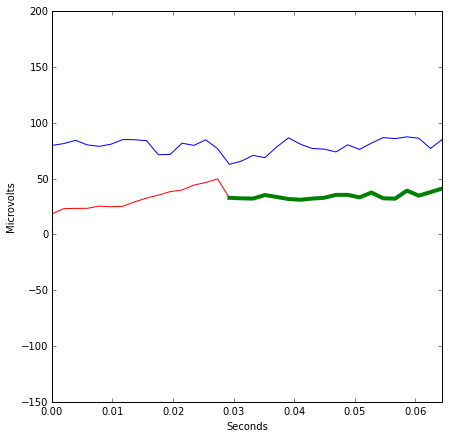

In [43]:
## Check FIR PM filter delay
figure(2, figsize=(7, 7))
# Plot the original signal
plot(EEGtimes/1000, signal)
# Plot the filtered signal, shifted to compensate for the phase delay
plot((EEGtimes/1000)-delay, filtered_signal, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot((EEGtimes[warmup:]/1000)-delay, filtered_signal[warmup:], 'g', linewidth=4)
#plt.gca().set_ylim([-40,40])
plt.gca().set_xlim([0,(warmup+4)/sample_rate])
plt.ylabel('Microvolts')
plt.xlabel('Seconds')
print 'Phase offset:', delay, 'seconds'
sampledelay = (warmup / 2) # The phase delay of the filtered signal in samples
print 'Phase offset:', sampledelay, 'samples'
plt.show()

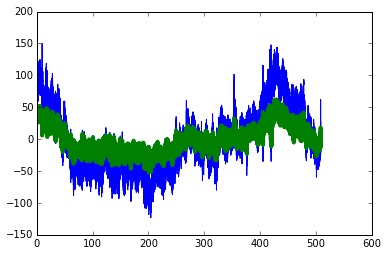

In [44]:
## Plot FIR PM filtered signal
plot(EEGtimes/1000, signal) # Plot the original signal
plot(EEGtimes/1000-delay, filtered_signal, # Plot the filtered signal, shifted to compensate for the phase delay
     'r-') 
plot(EEGtimes[warmup:]/1000-delay, # Plot just the "good" part of the filtered signal.
     filtered_signal[warmup:], 'g', linewidth=4) 
plt.gca().set_xlim(left=0)
plt.show()

In [45]:
## Generate IIR Butterworth Filter coefficients
numtaps = 4 # of taps
nyq = 0.5 * sample_rate #nyquist frequency - see http://www.dspguide.com/ if you want more info

## Butterworth
low = float(lowcut) / nyq
high = float(highcut) / nyq
b, a = butter(numtaps, [low,high], 'band') # IIR
print '# of coeffs:', len(b)
print 'Filter order:', numtaps #?
print 'Filter numerators:', b
print 'Filter denominators:', a

# of coeffs: 9
Filter order: 4
Filter numerators: [  7.00629448e-09   0.00000000e+00  -2.80251779e-08   0.00000000e+00
   4.20377669e-08   0.00000000e+00  -2.80251779e-08   0.00000000e+00
   7.00629448e-09]
Filter denominators: [  1.          -7.89538014  27.32856566 -54.1638917   67.23060096
 -53.5164312   26.67911513  -7.61561465   0.95303599]


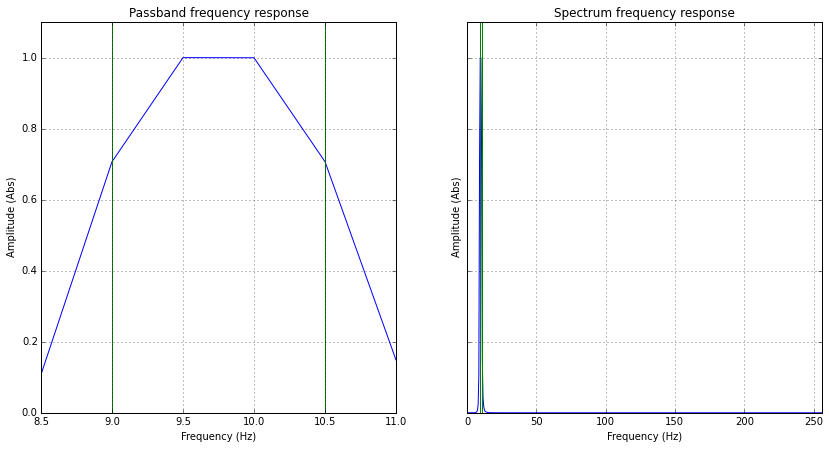

In [46]:
## Display frequency response of IIR Butterworth filter

## Compute frequency response
w, h = freqz(b,a) # frequency response for arbitrary FIR digital filter
f, axes = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
for axn, cax in enumerate(axes):
    plt.sca = cax
    ## Decide on axes units here
    #plt.plot(w, abs(h))                        #Angular frequency, Absolute response
    # plt.plot(w, 20 * np.log10(abs(h)))            #Angular frequency, dB
    cax.plot(w*nyq/np.pi, abs(h))                #Hz, Absolute response
    #plt.plot(w*nyq/np.pi, 20 * np.log10(abs(h))) #Hz, dB

    ## Display in Hz
    cax.axvline(lowcut, color='green')
    cax.axvline(highcut, color='green') 
    cax.set_xlabel('Frequency (Hz)')

    ## Display in Angular Frequency
    # plt.axvline(lowcut*np.pi/nyq, color='green') # cutoff Angular frequency
    # plt.axvline(highcut*np.pi/nyq, color='green') # cutoff Angular frequency
    # plt.xlabel('Frequency (Angular - 2*pi/sec)')

    ## Display in dB
    # plt.gca().set_ylim([-6,1.1]) # dB, should be flat in passband
    # plt.ylabel('Amplitude (dB)')

    ## Display in absolute response
    cax.set_ylim([0,1.1]) #Absolute response, should be flat in passband
    cax.set_ylabel('Amplitude (Abs)')

    ## View size in Hz
    if axn == 0:
        cax.set_xlim([lowcut-0.5,highcut+0.5]) # Passband view
    if axn == 1:
        cax.set_xlim([0,nyq]) # Spectrum view

    ## View size in Angular Frequency
    # plt.gca().set_xlim([(lowcut-1)*np.pi/nyq,(highcut+1)*np.pi/nyq]) # Passband view
    # plt.gca().set_xlim([0,np.pi]) # Spectrum view

    ## Display in linear space
    cax.set_yscale('linear')
    cax.set_xscale('linear')

    ## Show
    cax.margins(0, 0.1)
    cax.grid(which='both', axis='both')
    if axn == 0:
        cax.set_title('Passband frequency response')
    if axn == 1:
        cax.set_title('Spectrum frequency response')
f.show()

In [47]:
## Apply FIR PM filter
filtered_signal = lfilter(b, 1, signal) # a=1 for FIR filters

Phase offset: 0.02734375 seconds
Phase offset: 14 samples


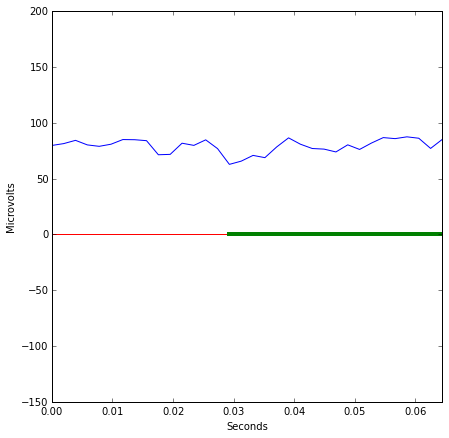

In [48]:
## Check FIR PM filter delay
figure(2, figsize=(7, 7))
# Plot the original signal
plot(EEGtimes/1000, signal)
# Plot the filtered signal, shifted to compensate for the phase delay
plot((EEGtimes/1000)-delay, filtered_signal, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot((EEGtimes[warmup:]/1000)-delay, filtered_signal[warmup:], 'g', linewidth=4)
#plt.gca().set_ylim([-40,40])
plt.gca().set_xlim([0,(warmup+4)/sample_rate])
plt.ylabel('Microvolts')
plt.xlabel('Seconds')
print 'Phase offset:', delay, 'seconds'
sampledelay = (warmup / 2) # The phase delay of the filtered signal in samples
print 'Phase offset:', sampledelay, 'samples'
plt.show()

In [49]:
## Plot group delay
# w, gd = group_delay((b, a))
# plt.title('Digital filter group delay')
# plt.plot(w, gd)
# plt.ylabel('Group delay [samples]')
# plt.xlabel('Frequency [rad/sample]')
# plt.show()

In [ ]:
loadedmat = sp.io.loadmat("C:\Users\Rob\Desktop\Dropbox\UCSD\Labs\Voytek\CBCI\PilotData\P04(Scotty)\P04_main1.mat")